In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#path = "iris.csv"
headernames = ['petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,,petal-length,petal-width,Class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values
# y = dataset.target

In [9]:
dataset.Class = dataset.Class.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [11]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

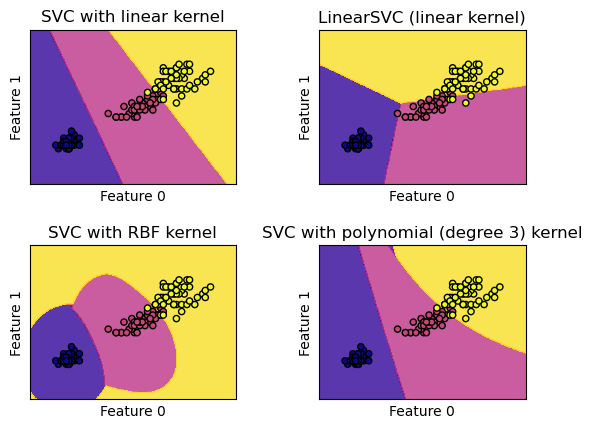

In [12]:
C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

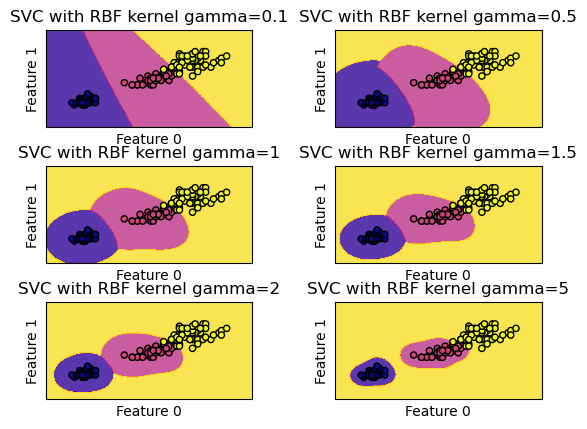

In [18]:
C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=0.5, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=1.5, C=C),
          svm.SVC(kernel='rbf', gamma=2, C=C),
          svm.SVC(kernel='rbf', gamma=5, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with RBF kernel gamma=0.1',
          'SVC with RBF kernel gamma=0.5',
          'SVC with RBF kernel gamma=1',
         'SVC with RBF kernel gamma=1.5',
         'SVC with RBF kernel gamma=2',
         'SVC with RBF kernel gamma=5',)


fig, sub = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 各核函数特点:

1.线性核函数:参数少,速度快

2.多项式核函数:从低维到高维,更精确,计算复杂度大

3.RBF核函数:参数少,局部性强

### 如何选择合适的核函数:

1.特征多,样本规模不大:线性核函数/多项式核函数

2.特征少,样本规模大:RBF核函数

3.特征少,样本规模极大:线性核函数

### 如何选择gamma的值
gamma越大，高斯分布将会又瘦又高,只作用于支持向量样本附近,对其他样本分类差

如果发现训练数据上的准确率低，我们可以试着调大gamma。

如果发现训练数据上的准确率极高，我们可以试着调小gamma。

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
# Load the diabetes dataset
diabetes = load_diabetes()
 
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)
 
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Train a SVR model on the scaled data
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
 
# Evaluate the model on the training and test sets
print('Training set score: {:.3f}'.format(svr.score(X_train_scaled, y_train)))
print('Test set score: {:.3f}'.format(svr.score(X_test_scaled, y_test)))

Training set score: 0.724
Test set score: 0.216


模型效果较差,测试集上得分为0.216

我认为可以改进的地方;

1.鉴于模型准确率较低,我们应当比较多个模型,尝试不同参数,选取最优

2.将数据特征与数据类别相关联,选取最相关的几个特征,去掉重复冗余特征,提高精确率